In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# TensorFlow and tf.keras
import tensorflow as tf
#from tensorflow.keras.layers import *
#from tensorflow.keras.models import *
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K

# Helper libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def s(x):
    
    "Activation function to implement the basis functions, cubic"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/6, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<2*tf.ones(tf.shape(x))),
                 (-3.*(x-1.)**3 +3.*(x-1.)**2 + 3*(x-1.)+1.)/6.,
                 tf.zeros(tf.shape(x))
                )
    
    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*2<=x, x<3*tf.ones(tf.shape(x))),
                 (3*(x-2)**3 - 6*(x-2)**2 + 4. )/6.,
                 tf.zeros(tf.shape(x))
                )

    y3 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*3<=x, x<4*tf.ones(tf.shape(x))),
                 ( 4. -x)**3/6.,
                 tf.zeros(tf.shape(x))
                )    
    
    y  = y0 + y1 + y2 + y3
    
    return y

def sm(x):
    
    "Activation function to implement the basis functions"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/6, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<2*tf.ones(tf.shape(x))),
                 x**3/6,
                 tf.zeros(tf.shape(x))
                )
    
    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*2<=x, x==x ), 
                  2./3.*tf.ones(tf.shape(x)), 
                  tf.zeros(tf.shape(x)) )
    
    y  = y0 + y1 + y2
    
    return y

def sm(x):
    
    "Activation function to implement the basis functions, cubic"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/6, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<3*tf.ones(tf.shape(x))),
                 (-x**3 +6.*x**2 - 6*x +2.)/6.,
                 tf.zeros(tf.shape(x))
                )

    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*3<=x, x<4*tf.ones(tf.shape(x))),
                 (x**3 -12.*x**2 + 48*x -52.)/6.,
                 tf.zeros(tf.shape(x))
                )    
    
    y3 = K.switch(tf.ones(tf.shape(x))*4<=x, 
                  2.*tf.ones(tf.shape(x)), 
                  tf.zeros(tf.shape(x)) )
    
    y  = y0 + y1 + y2 + y3
    
    return y

def sm(x):
    
    "Activation function to implement the basis functions, cubic"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/12, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<3*tf.ones(tf.shape(x))),
                 (-x**3 +6.*x**2 - 6*x +2.)/12.,
                 tf.zeros(tf.shape(x))
                )

    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*3<=x, x<4*tf.ones(tf.shape(x))),
                 (x**3 -12.*x**2 + 48*x -52.)/12.,
                 tf.zeros(tf.shape(x))
                )    
    
    y3 = K.switch(tf.ones(tf.shape(x))*4<=x, 
                  1.*tf.ones(tf.shape(x)), 
                  tf.zeros(tf.shape(x)) )
    
    y  = y0 + y1 + y2 + y3
    
    return y

def sm(x):
    
    "Activation function to implement the basis functions, cubic"
    
    y0 = K.switch(tf.logical_and(tf.zeros(tf.shape(x))<=x, x<tf.ones(tf.shape(x))), 
                 x**3/6, 
                 tf.zeros(tf.shape(x))
                )
    
    y1 = K.switch(tf.logical_and(tf.ones(tf.shape(x))<=x, x<3*tf.ones(tf.shape(x))),
                 (-x**3 +6.*x**2 - 6*x +2.)/6.,
                 tf.zeros(tf.shape(x))
                )

    y2 = K.switch(tf.logical_and(tf.ones(tf.shape(x))*3<=x, x<4*tf.ones(tf.shape(x))),
                 (x**3 -12.*x**2 + 48*x -52.)/6.,
                 tf.zeros(tf.shape(x))
                )    
    
    y3 = K.switch(tf.ones(tf.shape(x))*4<=x, 
                  2.*tf.ones(tf.shape(x)), 
                  tf.zeros(tf.shape(x)) )
    
    y  = y0 + y1 + y2 + y3 - tf.ones(tf.shape(x))
    
    return y

def partition_weights(n,n0):
    p0 = n0*n
    y = np.zeros((n,p0))
    for i in range(n):
        y[i,i*n0:(i+1)*n0] = 1.
    return y 

def partition_bias(n,n0):
    p0 = n0*n
    return (np.arange(0.,p0)%n0)    

def spline_function_(n,m,c0,u0):
    """Cubic spline"""
    
    d0 = 3 # if the degree is 3 then use the activation function s3(), if it's 2 then use s()
 
    n0 = c0 + d0
    p0 = n0*n

    inn = tf.keras.layers.Input(shape=(n,))

    l00 = tf.keras.layers.Dense(activation=s,
                                units=p0,
                                use_bias=True,
                                trainable=False,
                                kernel_initializer=tf.constant_initializer(c0*partition_weights(n,n0)),
                                bias_initializer=tf.constant_initializer(d0 - partition_bias(n,n0)) 
                               )(inn)
    
    out = tf.keras.layers.Dense(units=m,
                                use_bias=False,
                                trainable=True,
                                kernel_initializer=tf.constant_initializer(u0)
                               )(l00)

    model = tf.keras.Model(inputs=inn, 
                           outputs= out
                          )
    return model


print(tf.__version__)

2.1.0


In [2]:
x = np.arange(0.,4,0.001)
y = [s(x0) for x0 in x]

df_activation = pd.DataFrame(dict(x=x, S=np.array(y)))
#df_activation

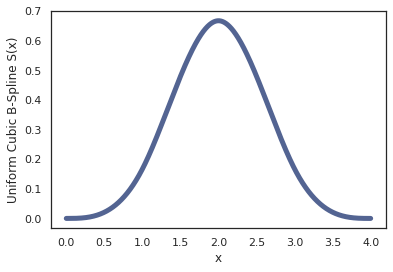

In [3]:
fig = plt.figure(1)

sns.lineplot(x='x',y='S',data=df_activation,
             color=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)(0.65),
             linewidth=5)
fig.gca().set(xlabel=r'x', ylabel=r'Uniform Cubic B-Spline S(x)')
fig.savefig("KASAM_Paper_Theory_Plots/uniform_cubic_b_spline_activation_function.png", close = True, verbose = True)

In [4]:
r = 0.6
x0 = np.arange(0.-r,1.+r, 0.001)
my_dict = dict(x=x0)

for j in range(0,8):
    #
    # Initialise a model
    model = spline_function_(1,1,5,0.)

    # Print model summary
    #model.summary()

    # Adjust weights for testing purposes, comment out otherwise
    weights = model.get_weights()
    #print(weights)
    weights[2][j] = 1.
    model.set_weights(weights)

    #output1 = model.predict(x0)


    my_dict[str(j)] = model.predict(x0).flatten()
    
df_uniform_spline_basis = pd.DataFrame(my_dict)
#df_uniform_spline_basis

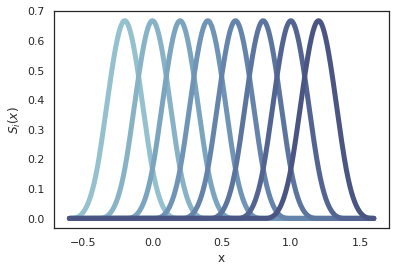

In [5]:
#fig = plt.figure(10)
fig = plt.figure(10)
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
for j in range(0,8):
    sns.lineplot(x='x',y=str(j),data=df_uniform_spline_basis,\
                 color=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)(0.075*j+0.2),linewidth=5)
    #ns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
fig.gca().set(xlabel=r'x', ylabel=r'$S_{i}(x)$')
fig.savefig("KASAM_Paper_Theory_Plots/uniform_cubic_b_spline_basis_functions.png", 
            close = True, verbose = True, dpi=500)

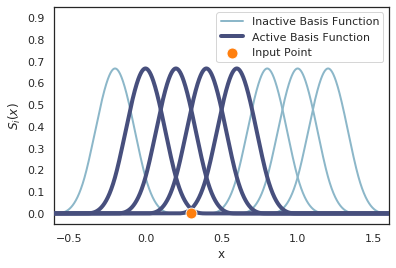

In [6]:
index0 = 3

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df_active_point = pd.DataFrame(dict(x=np.array([0.3]), y=np.array([0.])))

fig = plt.figure(10)

g = sns.scatterplot(data=df_active_point, x="x", y="y",color=sns.color_palette("tab10")[1],
                    zorder=20,label="Input Point",s=120)
g.set_xticks(np.arange(-0.5,2.0,0.5))
g.set_yticks(np.arange(0.,1.7,0.1))

#sns.lineplot(x='x',y='y',data=df_true_function,color=sns.color_palette('Greens')[index0],linewidth=2)

for j in range(0,8):
    if j == 0:
        colorchoice = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)(0.25)
        sns.lineplot(x='x',y=str(j),data=df_uniform_spline_basis,\
                     color=colorchoice,linewidth=2,label="Inactive Basis Function")
    elif j == 1:
        colorchoice = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)(0.75)
        sns.lineplot(x='x',y=str(j),data=df_uniform_spline_basis,\
                     color=colorchoice,linewidth=4,zorder=10,label="Active Basis Function")
    elif ((j>1) and (j<=4)):
        colorchoice = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)(0.75)
        sns.lineplot(x='x',y=str(j),data=df_uniform_spline_basis,\
                     color=colorchoice,linewidth=4,zorder=10)
    else:
        colorchoice = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)(0.25)
        sns.lineplot(x='x',y=str(j),data=df_uniform_spline_basis,\
                     color=colorchoice,linewidth=2)

#plt.legend()
#labels0 = []
#for j in strat_number:
#    labels0.append(str(j))
#labels0.append("Data")
    
legend = plt.legend(loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('white')
plt.ylim(-0.05,0.95)
plt.xlim(-0.6,1.6)

fig.gca().set(xlabel=r'x', ylabel=r'$S_{i}(x)$')
fig.savefig("KASAM_Paper_Theory_Plots/SAM_properties_1_2_Proof.png", close = True, verbose = True, dpi=500)

# Visual Plot of Properties 1 and 2

In [7]:
r = 0.6
x0 = np.arange(0.-r,1.+r, 0.001)
my_dict = dict(x=x0)

number_basis_functions = 16 # must be more than 4

for j in range(0,number_basis_functions):
    #
    # Initialise a model
    model = spline_function_(1,1,number_basis_functions-3,0.)

    # Print model summary
    #model.summary()

    # Adjust weights for testing purposes, comment out otherwise
    weights = model.get_weights()
    #print(weights)
    weights[2][j] = 1.
    model.set_weights(weights)

    #output1 = model.predict(x0)


    my_dict[str(j)] = model.predict(x0).flatten()
    
df_uniform_spline_basis = pd.DataFrame(my_dict)
#df_uniform_spline_basis

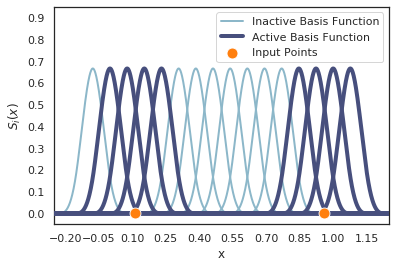

In [8]:
index0 = 3

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df_active_point = pd.DataFrame(dict(x=np.array([0.11]), y=np.array([0.])))
df_active_point2 = pd.DataFrame(dict(x=np.array([.96]), y=np.array([0.])))

fig = plt.figure(10)

g = sns.scatterplot(data=df_active_point, x="x", y="y",color=sns.color_palette("tab10")[1],
                    zorder=20,label="Input Points",s=120)
sns.scatterplot(data=df_active_point2, x="x", y="y",color=sns.color_palette("tab10")[1],
                    zorder=20,s=120)
g.set_xticks(np.arange(-0.5,2.0,0.15))
g.set_yticks(np.arange(0.,1.7,0.1))

#sns.lineplot(x='x',y='y',data=df_true_function,color=sns.color_palette('Greens')[index0],linewidth=2)

for j in range(0,16):
    if j == 0:
        colorchoice = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)(0.25)
        sns.lineplot(x='x',y=str(j),data=df_uniform_spline_basis,\
                     color=colorchoice,linewidth=2,label="Inactive Basis Function")
    elif j == 1:
        colorchoice = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)(0.75)
        sns.lineplot(x='x',y=str(j),data=df_uniform_spline_basis,\
                     color=colorchoice,linewidth=4,zorder=10,label="Active Basis Function")
    elif ((j>1) and (j<=4)):
        colorchoice = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)(0.75)
        sns.lineplot(x='x',y=str(j),data=df_uniform_spline_basis,\
                     color=colorchoice,linewidth=4,zorder=10)
    elif (j>11):
        colorchoice = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)(0.75)
        sns.lineplot(x='x',y=str(j),data=df_uniform_spline_basis,\
                     color=colorchoice,linewidth=4,zorder=10)        
    else:
        colorchoice = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)(0.25)
        sns.lineplot(x='x',y=str(j),data=df_uniform_spline_basis,\
                     color=colorchoice,linewidth=2)

#plt.legend()
#labels0 = []
#for j in strat_number:
#    labels0.append(str(j))
#labels0.append("Data")
    
legend = plt.legend(loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('white')
plt.ylim(-0.05,0.95)
plt.xlim(-0.25,1.25)

fig.gca().set(xlabel=r'x', ylabel=r'$S_{i}(x)$')
fig.savefig("KASAM_Paper_Theory_Plots/SAM_properties_3_Proof.png", close = True, verbose = True, dpi=500)

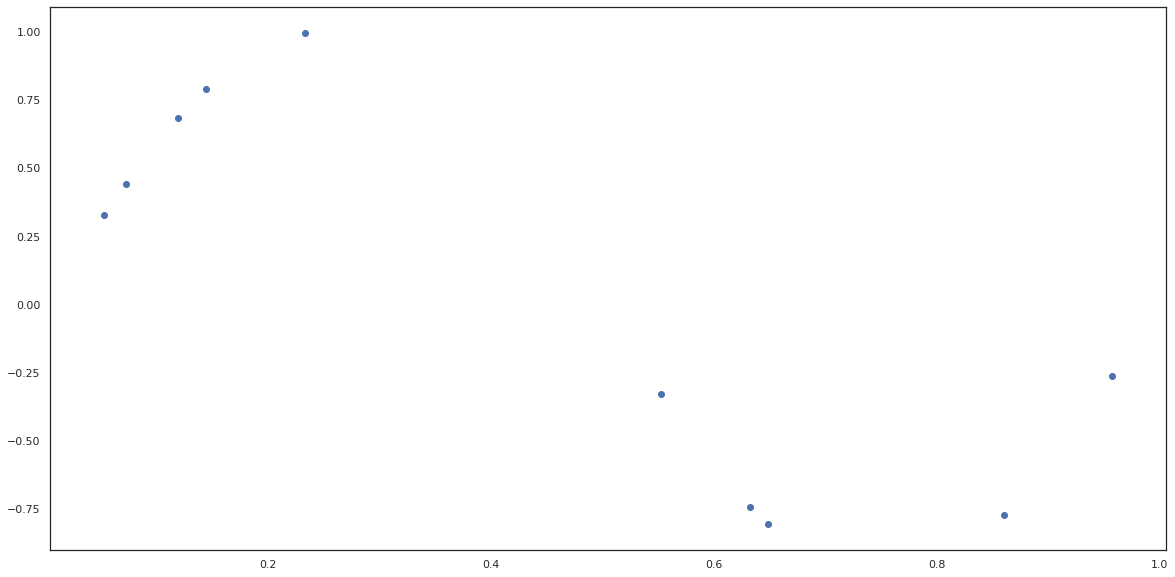

In [9]:
rs = np.random.RandomState(16989)
x = rs.rand(10)
y0 = np.sin(2.*np.pi*x)

plt.figure(figsize=(20,10))

plt.scatter(x,y0)

[Text(0, 0.5, '$y$'), Text(0.5, 0, '$x$')]

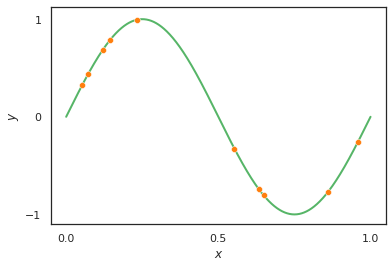

In [10]:
dx = 0.001
index0 = 3
x1 = np.arange(0.,1.+dx,dx)
y1 = np.sin(2.*np.pi*x1)

df_training_set = pd.DataFrame(dict(x=x, y=y0))
df_true_function = pd.DataFrame(dict(x=x1, y=y1))

fig = plt.figure(10)

sns.lineplot(x='x',y='y',data=df_true_function,color=sns.color_palette('Greens')[index0],linewidth=2)

g = sns.scatterplot(data=df_training_set, x="x", y="y",color=sns.color_palette('tab10')[1],zorder=10)
g.set_xticks(np.arange(0.,1.5,0.5))
g.set_yticks(np.arange(-1.,1.5,1.))

fig.gca().set(xlabel=r'$x$', ylabel=r'$y$')
#fig.savefig("iclr_paper/uniform_cubic_b_spline_stratification.png", close = True, verbose = True, dpi=500)

In [11]:
dict_strat = dict()
dict_strat['x'] = x1

#strat_number = [1,5,13,29,61,125,253,509]
strat_number = [5,13,253]

for strat_example in strat_number:
    # [1,5,13,29,61,125,253,509]
    model = spline_function_(1,1,strat_example,0.)


    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.075),
                  loss=tf.keras.losses.mean_squared_error,metrics=['mse'])
    model.fit(x, y0, epochs=5,verbose=0)

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.05),
                  loss=tf.keras.losses.mean_squared_error,metrics=['mse'])
    model.fit(x, y0, epochs=10,verbose=0)

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
                  loss=tf.keras.losses.mean_squared_error,metrics=['mse'])
    model.fit(x, y0, epochs=40,verbose=0)

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                  loss=tf.keras.losses.mean_squared_error,metrics=['mse'])
    model.fit(x, y0, epochs=80,verbose=0)

    dict_strat[str(strat_example)] = model.predict(x1).flatten()

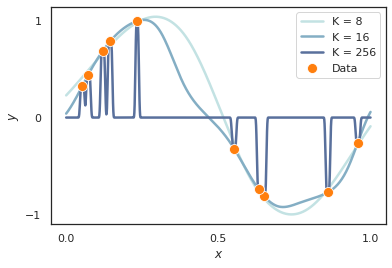

In [12]:
dx = 0.001
index0 = 3
x1 = np.arange(0.,1.+dx,dx)
y1 = np.sin(2.*np.pi*x1)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df_training_set = pd.DataFrame(dict(x=x, y=y0))
df_true_function = pd.DataFrame(dict(x=x1, y=y1))
df_stratification = pd.DataFrame(dict_strat)

fig = plt.figure(10)

g = sns.scatterplot(data=df_training_set, x="x", y="y",color=sns.color_palette("tab10")[1],
                    zorder=10,label="Data",s=100)
g.set_xticks(np.arange(0.,1.5,0.5))
g.set_yticks(np.arange(-1.,1.5,1.))

#sns.lineplot(x='x',y='y',data=df_true_function,color=sns.color_palette('Greens')[index0],linewidth=2)

for j in strat_number:
    sns.lineplot(x='x',y=str(j),data=df_stratification,\
                 color=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)(0.3*strat_number.index(j)+0.),
                 linewidth=2.5,zorder=strat_number.index(j)+5,label="K = "+str(j+3))


#plt.legend()
#labels0 = []
#for j in strat_number:
#    labels0.append(str(j))
#labels0.append("Data")
    
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')

fig.gca().set(xlabel=r'$x$', ylabel=r'$y$')
fig.savefig("KASAM_Paper_Theory_Plots/uniform_cubic_b_spline_stratification.png", 
            close = True, verbose = True, dpi=500)